<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020_private/blob/main/wyk%C5%82ad_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Podstawy sieci neuronowych, wykłady 3-6

# Wojciech Broniowski

## Instytut Fizyki, Uniwersytet Jana Kochanowskiego w Kielcach

# Inżynieria danych 2019/20

## Wersja z 18.04.2020

# Sieć neuronowa

# Importowane pakiety

In [1]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

### Zebranie oddzielnych instrukcji w jedną funkcję

In [2]:
def plot_net(n_war):
    """Narysuj szkielet sieci"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
        for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
            for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
                # współrzędne odpowiadają współrzędnym punktu

    plt.title("Sieć o inpucie i " + str(li_war-1)+" warstwach",fontsize=16)

    plt.axis("off")
    plt.show()

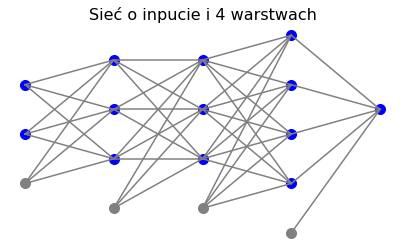

In [3]:
plot_net([3,4,4,5,2])

In [4]:
def plot_net_w(n_war, wagi):
    """Narysuj sieć z wagami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)
                

    plt.title("Sieć o inpucie i "+str(li_war-1)+" warstwach (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()

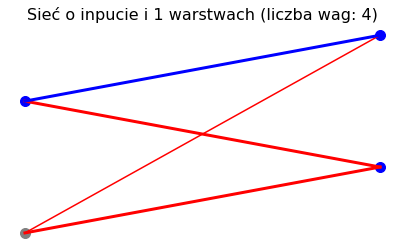

In [5]:
plot_net_w([2,3],{1:[[1,.5],[1,-1]]})

Pamietamy, że w naszej konwencji liczby wierzchołków zawierają wierzchołek progowy. Poniżej: [2,3,5]

Słownik wag zaczyna się od 1  i kończy na liczbie warstw minus (warswy numerujemy począwszu od 0). Poniżej: {1: ..., 2: ...}

Elementy słownika wag to macierze o wymiarze 2. Liczba wierszy wynosi tyle, ile jest elementów jest w warstwie wejściowej, a liczba kolumn tyle, ile jest elementów w warswie wyjściowej minus 1, bo nie uwzględniamy wierzchołka progowego.

Poniżej między warstwą 0 a 1 (element 1 słownika) mamy macierz 2x2, a między warstwą 1 a 2 (element 2 słownika) macierz 3x4.

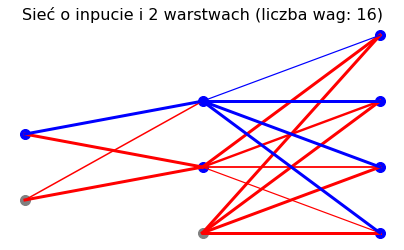

In [6]:
plot_net_w([2,3,5],{1:[[1,.5],[1,-1]],2:[[1,1,1,1],[.4,.6,.8,1],[-1,-1,-1,-.4]]})

In [7]:
def plot_net_w_x(n_war, wagi, x):
    """Narysuj sieć z wagami i sygnałami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
            lab=round(x[i][j],3)
            plt.text(i+0.1, j-n_war[i]/2+0.1, lab, fontsize=14)
    
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)

#    plt.title("Sieć o inpucie i "+str(li_war-1)+" warstwachS (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()

### Inicjalizowanie losowe wag

In [8]:
# skrót dla generowania liczby losowej w przedziale (-0.5,0.5)
def rn():
    return random.random()-0.5

In [9]:
# losowe wagi z przedziału (-0.5,0.5)
def ran_w(n_war):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

In [10]:
# losowe wagi z przedziału (-0.5s,0.5s)
def ran_w_s(n_war,s):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[s*rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

# Przybliżona reprezentacja funkcji ciągłych z pomocą sieci neuronowych 
# (regresja)

Dotychczas zajmowaliśmy się klasyfikatorami, tj. sieciami rozpoznającymu czy dany obiekt (u nas punkt na płaszczyźnie) posiada pewne cechy. W tym wykładzie pokażemy inne zastosowanie, bardzo przydatne w analizie pomiarów.

Wyobraźmy sobie, że mamy pewne dane doświadczalne. Tutaj symulujemy je w sztuczny sposób, np.

In [11]:
def fi(x):
    return 0.2+0.8*np.sin(x) # sinus + stała

In [12]:
# przykład 1
upx=np.pi                                 # zakres współrzędnej = [0,pi]
def dane():
    x = upx*random.random()               # współrzędna x z (0,pi)
    y = fi(x)+0.2*(random.random()-0.5)   # wartość funkcji, y=fi(x)+szum
    return [x,y]

In [13]:
dane() # losowa współrzędna x i zaszumione y

[1.0925814284351854, 0.9646689803628096]

Tablicujemy nasze (zaszumione) dane i robimy wykres wraz z funkcją fi(x), wokół której sie układają. Jest to imitacja pomiaru doświadczalnego, który zawsze obarczony jest pewnym błędem.

In [14]:
tab=np.array([dane() for i in range(50)]) # 50 punktów

da_f=np.delete(tab,1,1)                   # dane inputowe, czyli x
od_f=np.delete(tab,0,1)                   # prawdziwy output, czyli y

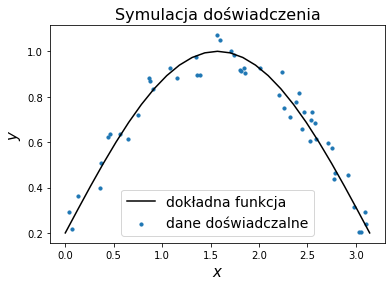

In [15]:
plt.figure(figsize=(6,4))

coo=np.linspace(0,upx,25)

exact=[fi(x) for x in coo]

plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.title("Symulacja doświadczenia",fontsize=16) 
plt.scatter(da_f,od_f,s=10,label='dane doświadczalne')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

W naszym obecnym języku sieci neuronowych mamy zatem próbke szkoleniową skladającą się z punktów o inpucie $x$ i outpucie $y_t=$fi$(x)$. Jak uprzednio, będziemy minimalizować w odpowiedniej sieci neuronowej (patrz poniżej) funkcję błędu po wagach $\{w\}$,

$B(\{w\})=\sum_p (y_u - y_t)^2$. 

Ponieważ $y_u$ jest pewną (zależną od wag) funkcją $x$ (wartość $y_u$ da nam sieć neuronowa), metoda ta jest wariantem tzw. metody najmniejszych kwadratów, stosowanej powszechnie w analizie danych. Różnica polega na tym, że w standardowej metodzie najmniejszych kwadratów modelowa funkcja którą dopasowujemy do danych ma jakąś prostą analityczną postać, np. $f(x)=A+Bx$), podczas gdy teraz jest ona pewną "zakamuflowaną" funkcją zależną od struktury sieci neuronowej, doboru funkcji aktywacji oraz wag jako parametrów.

Aby zrozumieć podstawową ideę, rozważmy sieć o dwóch neuronach w warstwie pośredniej:

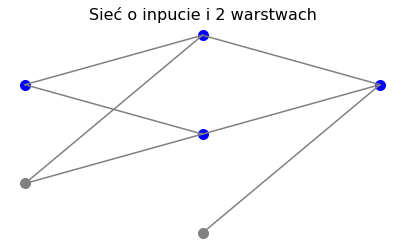

In [16]:
plot_net([2,3,2])

## Ciągła funkcja wzbudzenia - sigmoidalna

Dobrze jest użyć ciągłej funkcji aktywacji. Historycznie, używano tzw. **sigmoidu**:

$\sigma(s)=\frac{1}{1+\exp(-s)}$

In [17]:
# sigmoid, inaczej funkcja logistyczna, a także (1+arctanh(-s/2))/2 
def sig(s):
    return 1/(1+np.exp(-s))

Funkcja ta jest oczywiście różniczkowalna. Co więcej, 

$\sigma'(s)=\sigma(s)[1-\sigma(s)]$,

co jest jej szczególną cechą.

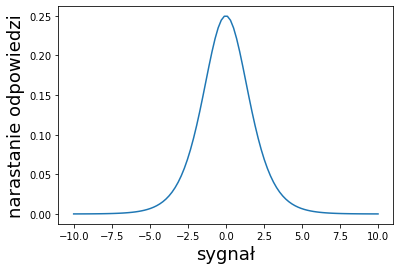

In [18]:
# pochodna sigmoidu
def dsig(s):
     return sig(s)*(1-sig(s)) # szczególna cecha tej funkcji
    
s = np.linspace(-10, 10, 100)
dfs = [dsig(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('narastanie odpowiedzi',fontsize=18)

plt.plot(s, dfs);    

Zgodnie z naszą notacją, sygnał docierający do neuronów w warstwie pośredniej to 

$s_1^{(1)}=w_{01}^{(1)}+w_{11}^{(1)} x$,

$s_2^{(1)}=w_{02}^{(1)}+w_{12}^{(1)} x$,

sygnał z nich wychodzący to, odpowiednio,

$\sigma \left( w_{01}^{(1)}+w_{11}^{(1)} x \right)$,

$\sigma \left( w_{02}^{(1)}+w_{12}^{(1)} x \right)$,

zatem sygnał wchodzący do neuronu w outpucie to 

$s_1^{(1)}=w_{01}^{(2)}+ w_{11}^{(2)}\sigma \left( w_{01}^{(1)}+w_{11}^{(1)} x \right)
+  w_{21}^{(2)}\sigma \left( w_{02}^{(1)}+w_{12}^{(1)} x \right)$. 

Biorąc celem ilustracji przykładowe wartości stałych 

$w_{01}^{(2)}=0, \, w_{11}^{(2)}=1, \, w_{21}^{(2)}=-1, \,
w_{11}^{(1)}=w_{12}^{(1)}=1, \, w_{01}^{(1)}=...,$

dostajemy 

$s_1^{(1)}=\sigma(x-x_1)-\sigma(x-x_2)$.

Funkcja ta w $- \infty$ dąży do 0, następnie rośnie z $x$, osiąga maksimum 
w $(x_1+x_2)/2$, po czym maleje, dążąc do 0 w $+\infty$. Przetawia to poniższy rusynek, sporządzony dla $x_1=0$ i $x_2=4$. 

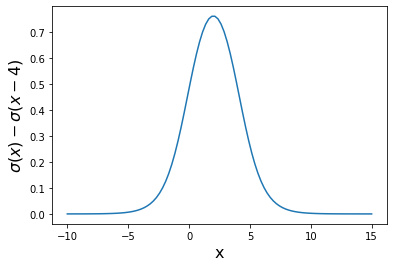

In [19]:
s = np.linspace(-10, 15, 100)

fs = [sig(z-0)-sig(z-4) for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('$\sigma(x)-\sigma(x-4)$',fontsize=16)

plt.plot(s, fs);

Tak więc jesteśmy w stanie utworzyć z parą neuronów w warstwie pośredniej sygnał ("garb"), który jest zlokalizowany wokół zadanej wartości, tutaj $(x_1+x_2)/2 =2$. Zmieniając inne parametry (wagi) jesteśmy w stanie modyfikować jego kształt, szerokość i wysokość. 

Mając do dyspozycji kilka takich par sigmoidów (czy garbów) możemy starać się "wypełnić" nimi funkcję, którą chcemy przybliżyć. Zaimprowizowany przykład, że jest to możliwe, pokazany jest poniżej:

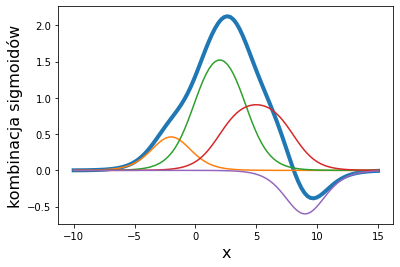

In [20]:
s = np.linspace(-10, 15, 100)

f1 = [sig(z+3)-sig(z+1) for z in s]
f2 = [2*(sig(z-0)-sig(z-4)) for z in s]
f3 = [sig(z-2)-sig(z-8) for z in s]
f4 = [-1.3*(sig(z-8)-sig(z-10)) for z in s]

fs = [sig(z+3)-sig(z+1)+2*(sig(z-0)-sig(z-4))+sig(z-2)-sig(z-8)-1.3*(sig(z-8)-sig(z-10)) 
       for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('kombinacja sigmoidów',fontsize=16)

plt.plot(s, fs, linewidth=4)
plt.plot(s, f1)
plt.plot(s, f2)
plt.plot(s, f3)
plt.plot(s, f4);


Na powyższym rysunku funkcje składowe (cienkie linie przedstawiające pojedyncze garby) sumują się do pewnej funkcji o dość skomplikowanym kształcie, oznaczonej grubą linią. Zauważmy, że po prostu sumujemy sygnały bez "obkładania" ich sigmoidem w warstwie outputowej, co niepotrzebnie spowodowałoby, że wartość funkcji byłaby miedzy 0 a 1. 

Mamy sięc następującą modyfikację sieci neuronowej przeznaczonej do interpolacji funkcji: 
**w warstwie outputowej odpowiedź jest liniowa**, tj. nie mamy tam sigmoidu (inaczej, funkcja aktywacji w tej warstwie jest funkcją identycznościową). Oczywiście w warstwach pośrednich sigmoidy zostają.

Możemy teraz "zatrudnić" propagację wsteczną, aby dopasować nasze dane doświadczalne do funkcji, która je interpoluje. Sieć będzie uczyć się na naszej próbce danych. 

Weźmy taką architekturę:

In [21]:
tab

array([[0.06680628, 0.21728919],
       [2.26161897, 0.7490463 ],
       [2.58991404, 0.61203084],
       [0.3564426 , 0.39738197],
       [2.00644663, 0.92762036],
       [1.36287532, 0.89410389],
       [3.10014223, 0.24020335],
       [2.70964993, 0.59554475],
       [0.13435181, 0.36181763],
       [3.03049444, 0.20567137],
       [3.04859104, 0.20289437],
       [2.4166218 , 0.81734517],
       [2.32409038, 0.71050422],
       [2.46412451, 0.73433072],
       [0.90789255, 0.83248017],
       [1.35419347, 0.97534325],
       [0.46139977, 0.63598581],
       [0.56726079, 0.63684367],
       [3.08974393, 0.29091032],
       [1.80554871, 0.91677116],
       [2.91419555, 0.45542064],
       [0.64762841, 0.61550567],
       [1.81711787, 0.91434412],
       [1.73995788, 0.98245567],
       [2.20219369, 0.80608736],
       [0.36580501, 0.50877026],
       [2.7809082 , 0.46436953],
       [1.15756642, 0.8822531 ],
       [1.59531486, 1.04778734],
       [0.87832755, 0.87020512],
       [0.

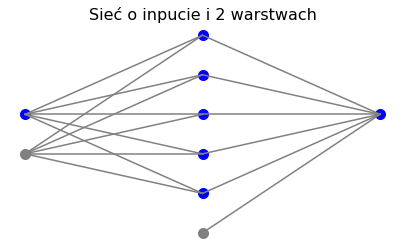

In [22]:
# siec z jedną warstwą pośrednią z kilkoma neuronami
siec=[2,6,2]
plot_net(siec)

Ponieważ odpowiedź w warstwie outputowej jest liniowa, wymaga to drobnych modyfikacji w uprzednim kodzie:

In [23]:
def feed_forward_lin(n_war, wagi, x_in):
    """Propagacja sygnału w przód z liniową odpowiedzią w ostatniej warstwie"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
     
    for i in range(1,li_war-1): # pętla po warstwach od inputowej do przedostatniej
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy i
                                    # (określony przez sigmoid)
        x.update({i: np.insert(b,0,1)}) 
        
    for i in range(li_war-1,li_war): # ostatnia warstwa
        a=np.dot(x[i-1],wagi[i])  # odpowiedź liniowa - TU MODYFIKACJA
        x.update({i: np.insert(a,0,1)}) 
    return x

In [24]:
def back_prop_lin(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna dla sieci z liniową odpowiedzią w warstwie outputowej"""
 
    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    x=feed_forward_lin(n_war,wagi,po) # propagacja sygnału do przodu
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(x[k+1][gam]-odp[p][gam-1])*
        (np.dot(x[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]}) 
                         # nie ma pochodnej sigmoidu - TU MODYFIKACJA

    wagi[k+1]-=eps*np.outer(x[k],D[k+1]) # uaktualnienie wag prowadzącch do warstwy outputowej

    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzenia
        v=np.dot(x[j-1],wagi[j])        
        D.update({j: [u[i]*dsig(v[i]) for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(x[j-1],D[j])      # uaktualnienie wag

### Propagacja wsteczna dla interpolacji danych

In [25]:
wagi=ran_w_s(siec,2) # początkowe losowe wagi

# Jeśli się wywraca, puszczać do skutku
for k in range(300): 
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [26]:
for k in range(3000):  # puścić kilka razy
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.01)

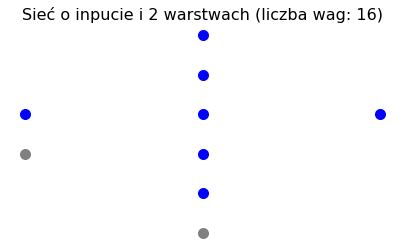

In [27]:
plot_net_w(siec,wagi)

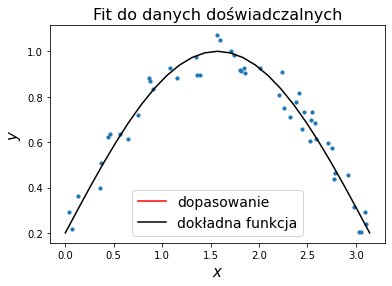

In [28]:
res=[feed_forward_lin(siec, wagi, [1,x])[2][1] for x in coo]

plt.figure(figsize=(6,4))

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f,od_f,s=10)


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

Powyżej widzimy, że dopasowana krzywa z sieci neuronowej (czerwona linia) jest bliska "prawdziwej" funkcji, którą generowaliśmy dane (dodając zaszumienie).

# A teraz to samo z wykorzystaniem pakietu https://scikit-learn.org 

In [29]:
# Dołączone pakiety

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

from sklearn.neural_network import MLPRegressor


In [30]:
# Generowanie danych - 100 punktów
tab=np.array([dane() for i in range(100)]) # 100 punktów

da_f=np.delete(tab,1,1)                   # dane inputowe, czyli x
od_f=np.delete(tab,0,1)                   # prawdziwy output, czyli y

# np.ravel returns a contiguous flattened array.
od_f = np.ravel(od_f)

# Przygotowanie danych
X_train, X_test, y_train, y_test = train_test_split(da_f, od_f, test_size=0.5, random_state=27) # połowa danych jakozbiór testowy



Rysowanie danych testowych

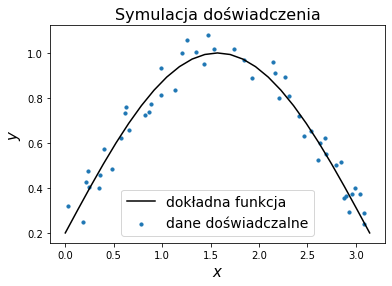

In [31]:
plt.figure(figsize=(6,4))

coo=np.linspace(0,upx,25)

exact=[fi(x) for x in coo]

plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.title("Symulacja doświadczenia",fontsize=16) 
plt.scatter(X_test,y_test,s=10,label='dane doświadczalne')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

# Aktualne dopasowanie z użyciem sieci neuronowej





In [32]:
est =  MLPRegressor(hidden_layer_sizes=(5, 5),
                                 learning_rate_init=0.001, activation='tanh', solver='lbfgs',
                                 alpha=0.0001, max_iter=100)
                                 #early_stopping=True)     # dwie wrastwy po 5 neuronów
# early_stoppingbool, default=False
# Whether to use early stopping to terminate training when validation score is not improving. If set to true,
# it will automatically set aside 10% of training data as validation and terminate training when validation 
# score is not improving by at least tol for n_iter_no_change consecutive epochs. Only effective when 
# solver=’sgd’ or ‘adam’



est.fit(X_train, y_train)
score = est.score(X_test, y_test)
print("Test score: {:.2f}".format(score))



Test score: 0.92


https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score 

R² score, the coefficient of determination

The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.



# Plot the fitted function

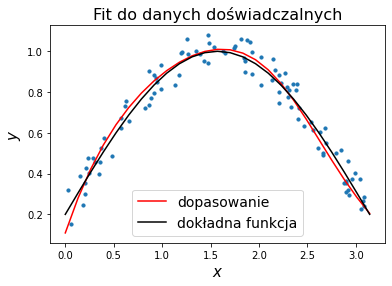

In [33]:
# otrzymujemy przewidywane wartości funkcji
res = est.predict(coo.reshape(len(coo),1))   # coo.reshape(len(coo),1) - zmiana "kształtu" z (25) na (25,1)

plt.figure(figsize=(6,4))

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f,od_f,s=10)


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

# Teraz rysujemy naszą sieć neuronową

--2020-11-15 17:48:01--  https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9495 (9.3K) [text/plain]
Saving to: ‘VisualizeNN.py’

VisualizeNN.py      100%[===================>]   9.27K  --.-KB/s    in 0s      

2020-11-15 17:48:02 (50.6 MB/s) - ‘VisualizeNN.py’ saved [9495/9495]



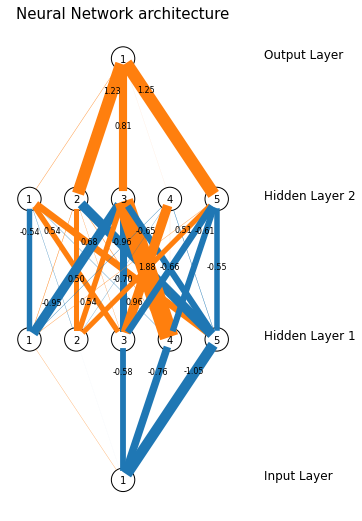

In [34]:
! wget https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py

import VisualizeNN as VisNN
'''
print(est.hidden_layer_sizes[0])
print(est.n_outputs_)
print(est.coefs_[0].shape)
print(est.coefs_[1].shape)
print(est.coefs_[2].shape)
'''

NN = list(est.hidden_layer_sizes)
NN.append(est.n_outputs_)
NN.insert(0,est.coefs_[0].shape[0])
network=VisNN.DrawNN(NN,est.coefs_)
network.draw()

# A teraz to samo z użyciem drzew decyzyjnych

---







In [37]:
# Załączamy pakiety
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [104]:

est = DecisionTreeRegressor(max_depth=4)

#est = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=4, random_state=21, learning_rate=0.00001)




est.fit(X_train, y_train)
score = est.score(X_test, y_test)
print("Test score: {:.2f}".format(score))



Test score: 0.80


# Plot the fitted function

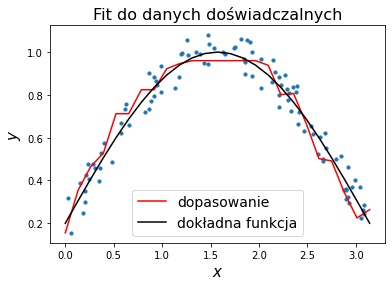

In [103]:
# otrzymujemy przewidywane wartości funkcji
res = est.predict(coo.reshape(len(coo),1))   # coo.reshape(len(coo),1) - zmiana "kształtu" z (25) na (25,1)

plt.figure(figsize=(6,4))

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f,od_f,s=10)


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);